In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import regex as re

In [3]:
import nltk
nltk.download('wordnet')
import pandas as pd
import os
from nltk.corpus import stopwords
import string
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import operator
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
am=pd.read_excel(r"C:\Users\Lenovo\Desktop\4_sem_Project_Final\scraped_final_am.xlsx")

In [6]:
am.head()

,Unnamed: 0,Seller URL,Sellers_name,Rating,Review,Date,Abs_rating,Positive_score,Rating score,Review_cat,Nu of review
0,0.0,https://www.amazon.in/sp?seller=AX6909EQRKV3V,seven_rays,4 out of 5 stars,Good\n,"8 June, 2020.",4,4,96.052632,Positive,55
1,1.0,https://www.amazon.in/sp?seller=AX6909EQRKV3V,seven_rays,1 out of 5 stars,Message says returned to seller without my per...,"27 May, 2020.",1,0,96.052632,Negative,55
2,2.0,https://www.amazon.in/sp?seller=AX6909EQRKV3V,seven_rays,5 out of 5 stars,Good,"10 April, 2020.",5,5,96.052632,Positive,55
3,3.0,https://www.amazon.in/sp?seller=AX6909EQRKV3V,seven_rays,5 out of 5 stars,The product fits perfectly and is as shown in ...,"18 March, 2020.",5,5,96.052632,Positive,55
4,4.0,https://www.amazon.in/sp?seller=AX6909EQRKV3V,seven_rays,1 out of 5 stars,"Seller, i have not received what i ordered for...","17 March, 2020.",1,0,96.052632,Negative,55


In [7]:
def cleanTxt(text):
    text=re.sub('@[A-Za-z0-9]+',"",text)
    text=re.sub('/d+',"",text)
    text=re.sub(","," ",text)
    text=re.sub('null',"",text)
    text=re.sub('https?:\/\/\S+','',text)
    text=re.sub('#',"",text)
    text=text.rstrip('\"')
    text=text.rstrip("\'")
    text=re.sub('!',"",text)
    text=re.sub('\\\\\w{1,3}',"",text)
    return text
        

In [8]:
am['Review']=am['Review'].apply(cleanTxt)

In [9]:
am['Review'] = am['Review'].str.replace("\nnull\n","")
am['Review'] = am['Review'].str.replace("nnull"," ")
am['Review'] = am['Review'].str.replace("\n","")
am['Review'] = am['Review'].str.lower()
#am.Review.head()
am.Review.head()

0                                                 good
1    message says returned to seller without my per...
2                                                 good
3    the product fits perfectly and is as shown in ...
4    seller  i have not received what i ordered for...
Name: Review, dtype: object

In [10]:
am=am.drop(['Unnamed: 0'],axis=1)

In [11]:
am.shape

(7641, 10)

In [31]:
am.isnull().sum()

Seller URL        0
Sellers_name      0
Rating            0
Review            0
Date              0
Abs_rating        0
Positive_score    0
Rating score      0
Review_cat        0
Nu of review      0
dtype: int64

In [7]:
print(am[am["Review"].isnull()])

Empty DataFrame
Columns: [Seller URL, Rating, Review, Date, Abs_rating, Positive_score, Rating score, Review_cat]
Index: []


In [8]:
am['Seller URL'].nunique()

56

In [32]:
am['Sellers_name'].value_counts()

Scanupi                          405
FIT AND GLOW                     395
TiedRibbons (186)                390
mamaearth                        370
Gadgets Appliances (122)         350
MuscleBlaze                      310
GreenMobiles                     270
Paper Plane Design (241)         240
cart2india                       240
DTHIndia                         215
Marshland Technology             190
VIMAL CLOTHING                   185
ImagineDesign                    170
HOUSE OF QUIRK                   165
Yogabar                          165
Tallenge Store                   165
Aditya Promoters LTD.            160
DeoDap                           160
Bookswagon                       150
JAAMSO ROYALS                    140
Atlantic Publisher…              130
StickMe                          130
MARKET YARD                      130
Urban Platter                    125
Bracevor                         125
Exclusive Lane (384)             120
Pure Source India (252)          115
E

In [35]:
am['Review_cat'].value_counts()

Positive    5317
Negative    2025
Neutral      299
Name: Review_cat, dtype: int64

count of rating score polarity based on top 6 nu of review of sellers


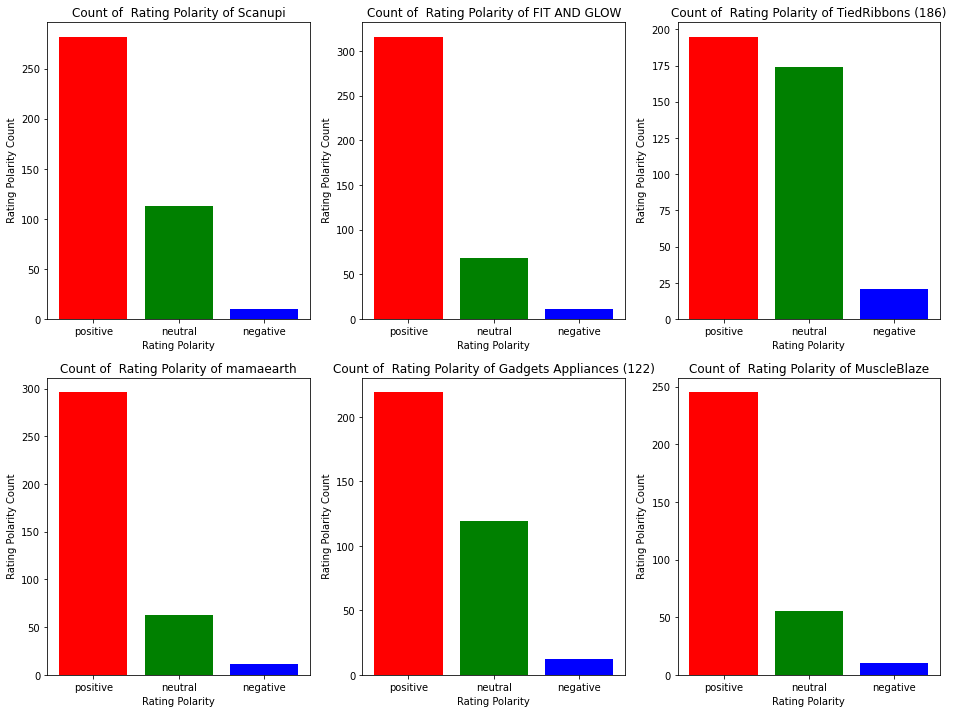

In [12]:
Top_6_handlers=["Scanupi" ,"FIT AND GLOW","TiedRibbons (186)","mamaearth","Gadgets Appliances (122)" ,"MuscleBlaze" ]
plt.figure(1,figsize=(16, 12))
for i in Top_6_handlers:
    indices= Top_6_handlers.index(i)
    plt.subplot(2,3,indices+1)
    new_df=am[am['Sellers_name']==i]
    count=new_df['Review_cat'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['positive','neutral','negative'])
    plt.ylabel(' Rating Polarity Count')
    plt.xlabel('Rating Polarity')
    plt.title('Count of  Rating Polarity of '+i)
print('count of rating score polarity based on top 6 nu of review of sellers')

In [39]:
am.dtypes

Seller URL         object
Sellers_name       object
Rating             object
Review             object
Date               object
Abs_rating          int64
Positive_score      int64
Rating score      float64
Review_cat         object
Nu of review        int64
dtype: object

Text(0, 0.5, 'count')

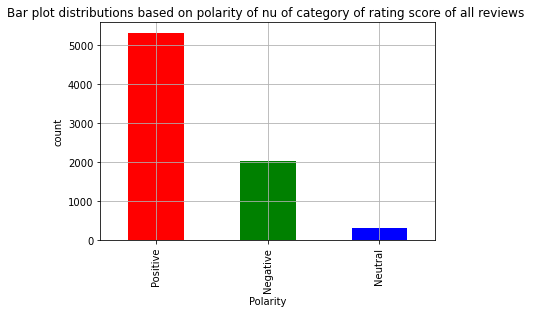

In [15]:

am['Review_cat'].value_counts().plot.bar(grid=True, color=['red', 'green', 'blue'], figsize = (6, 4))
plt.title('Bar plot distributions based on polarity of nu of category of rating score of all reviews ')
plt.xlabel('Polarity')
plt.ylabel('count')

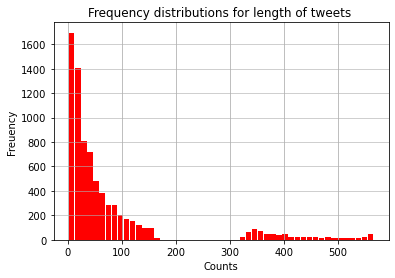

In [33]:
# checking the distribution of tweets in the data

length_Review= am['Review'].str.len().plot.hist(grid=True, bins=50, rwidth=0.9,color = 'Red', figsize = (6, 4))
plt.title('Frequency distributions for length of tweets ')
plt.xlabel('Counts')
plt.ylabel('Freuency')
plt.grid(axis='y', alpha=0.75)

In [12]:
Positive_Review=am[am['Review_cat']=='Positive']

,Seller URL,Rating,Review,Date,Abs_rating,Positive_score,Rating score,Review_cat
0,https://www.amazon.in/sp?seller=AX6909EQRKV3V,4 out of 5 stars,good,"8 June, 2020.",4,4,96.052632,Positive
2,https://www.amazon.in/sp?seller=AX6909EQRKV3V,5 out of 5 stars,good,"10 April, 2020.",5,5,96.052632,Positive
3,https://www.amazon.in/sp?seller=AX6909EQRKV3V,5 out of 5 stars,the product fits perfectly and is as shown in ...,"18 March, 2020.",5,5,96.052632,Positive
7,https://www.amazon.in/sp?seller=AX6909EQRKV3V,4 out of 5 stars,it was good but the frame size was too small ...,"9 March, 2020.",4,4,96.052632,Positive
8,https://www.amazon.in/sp?seller=AX6909EQRKV3V,5 out of 5 stars,good,"29 February, 2020.",5,5,96.052632,Positive


In [51]:
Positive_Review.shape[0]

5317

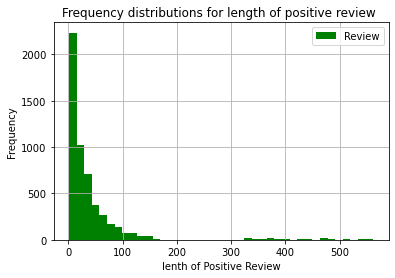

In [39]:

Positive_Review['Review'].str.len().plot.hist(grid=True,color = 'Green', rwidth=1,bins=40, figsize = (6, 4))
plt.title('Frequency distributions for length of positive review ')
plt.legend()
plt.xlabel('lenth of Positive Review')
plt.show()


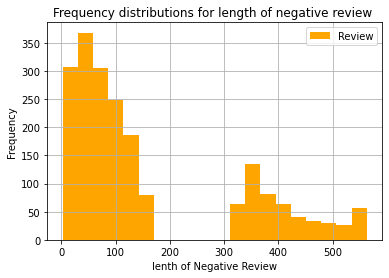

In [42]:
Negative_Review=am[am['Review_cat']=='Negative']
Negative_Review['Review'].str.len().plot.hist(color = 'Orange',grid=True, bins=20,figsize = (6, 4))
plt.title('Frequency distributions for length of negative review ')
plt.legend()
plt.xlabel('lenth of Negative Review')
plt.show()

In [43]:
print("Total number of review for each Seller \n ",am.groupby('Sellers_name')['Rating score'].mean().sort_values(ascending=False))

Total number of review for each Seller 
  Sellers_name
Glamfort                         99.367089
Marshland Technology             98.741419
ShopyStore                       98.507463
DTHIndia                         97.759674
MARKET YARD                      97.697368
seven_rays                       96.052632
Exotic India (322)               95.473251
Yogabar                          94.714882
Ada Chikan                       94.214876
Collectible India                93.796526
Lo! - Low Carb and Keto Foods    93.750000
VOLGA ENTERPRISES (181)          93.333333
mamaearth                        93.324692
FIT AND GLOW                     93.275756
Bracevor                         93.267327
TrustBasket                      93.103448
HOUSE OF QUIRK                   93.047337
MuscleBlaze                      92.902208
Exclusive Lane (384)             92.712551
StatueStudio                     92.576419
ImagineDesign                    91.839763
Aditya Promoters LTD.            91.666667

In [47]:
Top=am.groupby('Sellers_name')['Rating score'].mean().sort_values(ascending=False)
Top.head(10)

Sellers_name
Glamfort                99.367089
Marshland Technology    98.741419
ShopyStore              98.507463
DTHIndia                97.759674
MARKET YARD             97.697368
seven_rays              96.052632
Exotic India (322)      95.473251
Yogabar                 94.714882
Ada Chikan              94.214876
Collectible India       93.796526
Name: Rating score, dtype: float64

Top_6_handlers=["Glamfort","Marshland Technology", "ShopyStore", "DTHIndia", "MARKET YARD" , "seven_rays" ]
plt.figure(1,figsize=(16, 16))
for i in Top_6_handlers:
    indices= Top_6_handlers.index(i)
    plt.subplot(3,3,indices+1)
    new_df=am[am['Sellers_name']==i]
    count=new_df['Review_cat'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['positive','neutral','negative'])
    plt.ylabel('Polarity Count')
    plt.xlabel('Polarity')
    plt.title('Count of Polarity of '+i)

In [59]:
am['Seller URL'].nunique()

56

Positive words


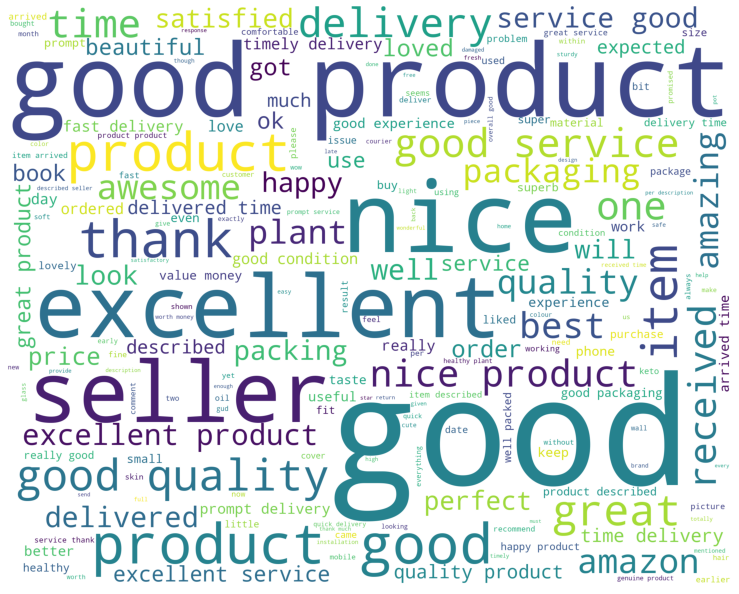

Negative words


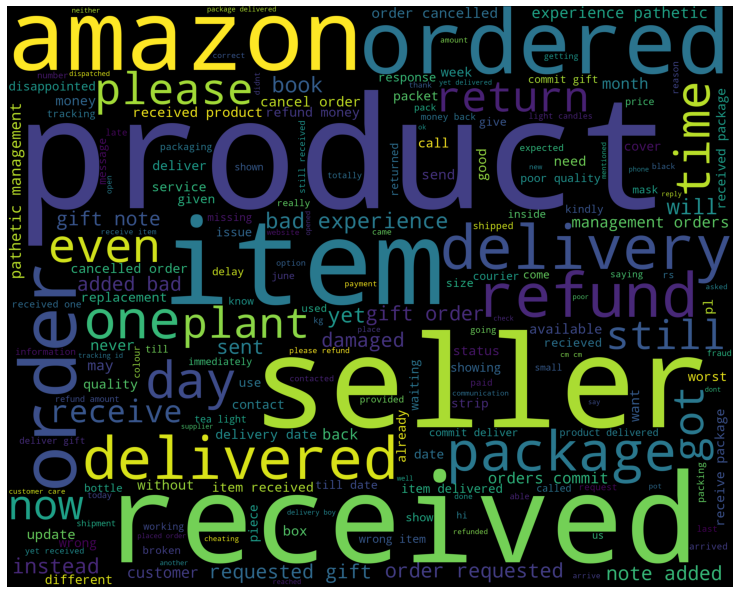

In [56]:
from wordcloud import WordCloud,STOPWORDS
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(Positive_Review['Review'],'white')
print("Negative words")
wordcloud_draw(Negative_Review['Review'])

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Positive_Review['Review'],'Most Common Words from the positive corpus')

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(pos_wordcloud,'white')
print("Negative words")
wordcloud_draw(neg_wordcloud)

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

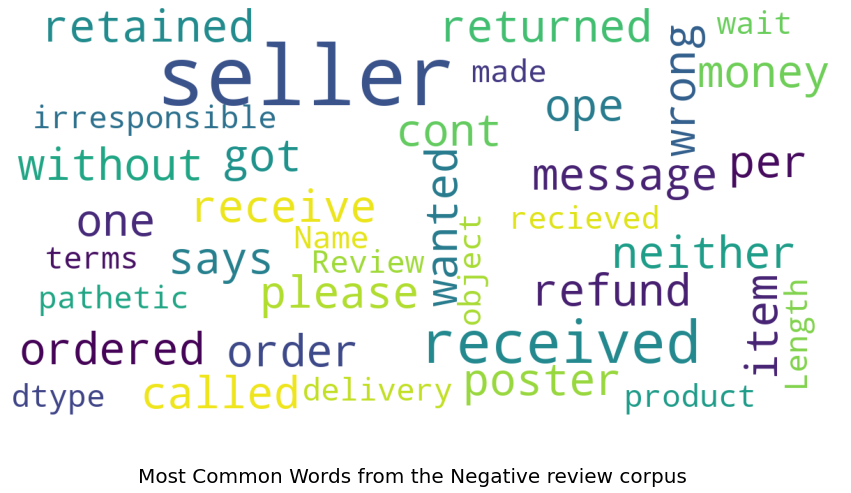

In [60]:
show_wordcloud(Negative_Review['Review'],'Most Common Words from the Negative review corpus')

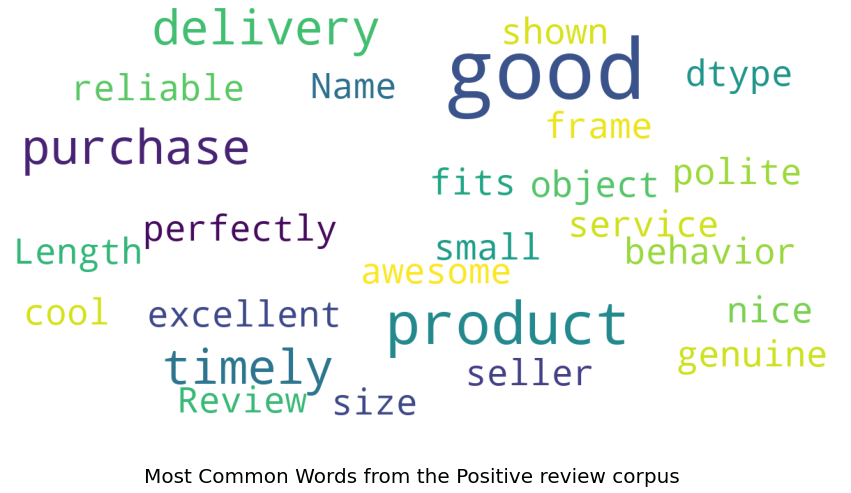

In [68]:
show_wordcloud(Positive_Review['Review'],'Most Common Words from the Positive review corpus')

In [62]:
import collections
stopwords = STOPWORDS
STOPWORDS |= {"!","."}

all_word = ' '.join(Positive_Review['Review'])



filtered_words = [word for word in all_word.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

<BarContainer object of 20 artists>

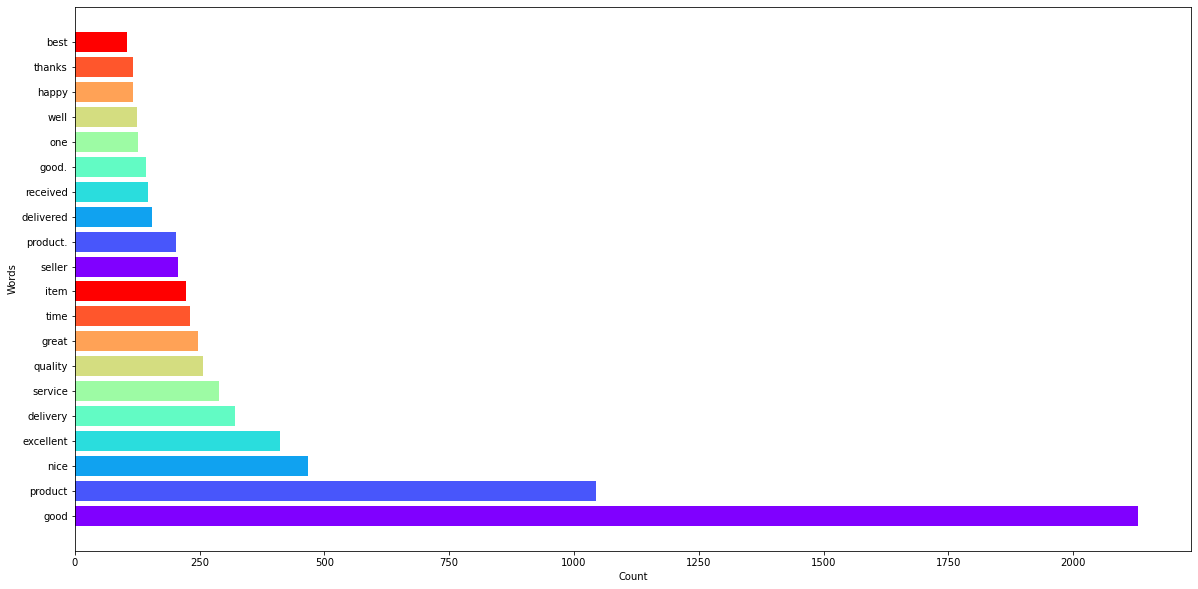

In [63]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

#plt.title('Top words in the Positive text review')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [64]:
print(words)

['good', 'product', 'nice', 'excellent', 'delivery', 'service', 'quality', 'great', 'time', 'item', 'seller', 'product.', 'delivered', 'received', 'good.', 'one', 'well', 'happy', 'thanks', 'best']


In [65]:
all_word = ' '.join(Negative_Review['Review'])



filtered_words = [word for word in all_word.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

<BarContainer object of 20 artists>

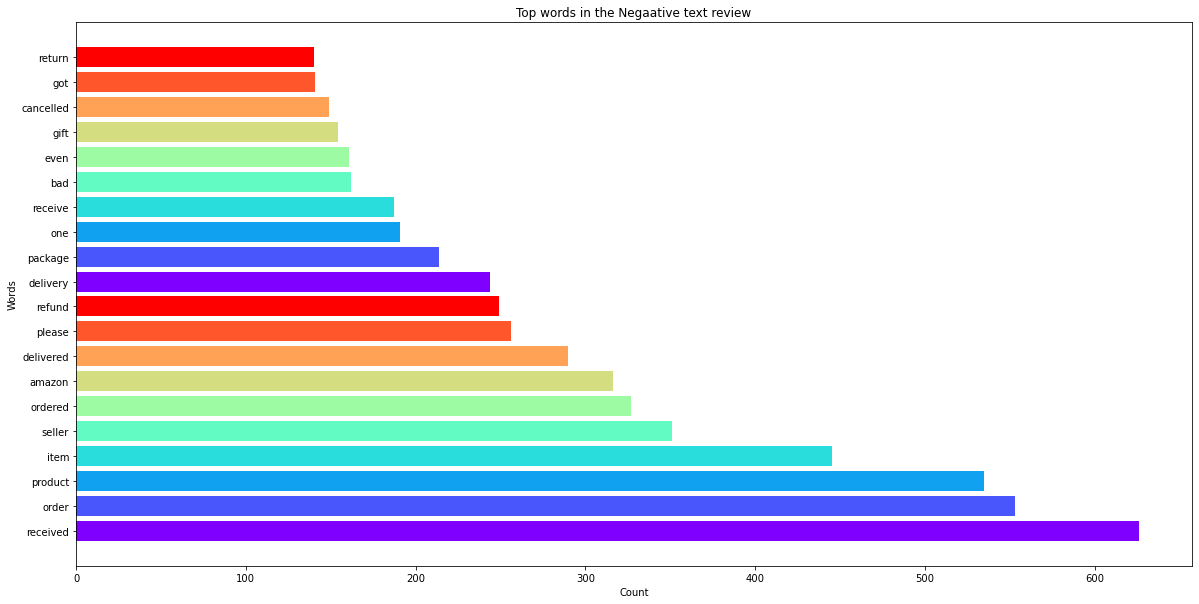

In [66]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Negaative text review')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [67]:
print(words)

['received', 'order', 'product', 'item', 'seller', 'ordered', 'amazon', 'delivered', 'please', 'refund', 'delivery', 'package', 'one', 'receive', 'bad', 'even', 'gift', 'cancelled', 'got', 'return']


In [7]:
am['Review'].head()

0                Lovely vinyl for my kitchen cupboards
1                                 Good decent product 
2    shows as described in the picture.  I loved it...
3      Had an awful experience twice with this seller.
4                                  Great little gadget
Name: Review, dtype: object

In [13]:
tokenized_review = am['Review'].apply(lambda x:x.split())
tokenized_review.head()

0                                               [good]
1    [message, says, returned, to, seller, without,...
2                                               [good]
3    [the, product, fits, perfectly, and, is, as, s...
4    [seller, i, have, not, received, what, i, orde...
Name: Review, dtype: object

In [14]:
#Stemming the words to remove words with similar meaning
from nltk. stem import PorterStemmer 
stemmer = PorterStemmer()
tokenized_review = tokenized_review.apply(lambda x : [stemmer.stem(i) for i in x]  )

In [15]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
import nltk
import string
import seaborn as sns
from nltk.stem.porter import * 
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline


In [16]:
#Stemming the words to remove words with similar meaning
stemmer = PorterStemmer()
tokenized_review = tokenized_review.apply(lambda x : [stemmer.stem(i) for i in x]  )

In [17]:
tokenized_review.head()

0                                               [good]
1    [messag, say, return, to, seller, without, my,...
2                                               [good]
3    [the, product, fit, perfectli, and, is, as, sh...
4    [seller, i, have, not, receiv, what, i, order,...
Name: Review, dtype: object

In [28]:
def stemma(am):

    stemmer = SnowballStemmer("english") #SnowballStemmer("english", ignore_stopwords=True)

    count = 0
    stemmed = []
    for sentence in am:
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(stemmer.stem(word))
        sentence = ' '.join(stemmed)
        am.iloc[count] = sentence
        count+=1
        stemmed = []
    return(am)

In [26]:
def lemma(am):

    lmtzr = WordNetLemmatizer()

    count = 0
    stemmed = []
    for sentence in am:    
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(lmtzr.lemmatize(word))
        sentence = ' '.join(stemmed)
        am.iloc[count] = sentence
        count+=1
        stemmed = []
    return(am)

In [29]:
am['Review'] = lemma(am['Review'])
am['Review'] = stemma(am['Review'])

In [30]:
Review_cat_Map={'Positive':1,'Neutral':0,'Negative':-1}
am['Review_cat']=am['Review_cat'].map(Review_cat_Map)

In [64]:
am.head()

,Unnamed: 0,Seller URL,Rating,Review,Date,Abs_rating,Positive_score,Rating score,Review_cat
0,0,https://www.amazon.in/sp?seller=A2U5V1CXO0WIJ3,5 out of 5 stars,Lovely vinyl for my kitchen cupboards,"21 June, 2020.",5,5,85.140562,1
1,1,https://www.amazon.in/sp?seller=A2U5V1CXO0WIJ3,5 out of 5 stars,Good decent product,"20 June, 2020.",5,5,85.140562,1
2,2,https://www.amazon.in/sp?seller=A2U5V1CXO0WIJ3,5 out of 5 stars,shows as described in the picture. I loved it...,"19 June, 2020.",5,5,85.140562,1
3,3,https://www.amazon.in/sp?seller=A2U5V1CXO0WIJ3,1 out of 5 stars,Had an awful experience twice with this seller.,"19 June, 2020.",1,0,85.140562,-1
4,4,https://www.amazon.in/sp?seller=A2U5V1CXO0WIJ3,5 out of 5 stars,Great little gadget,"18 June, 2020.",5,5,85.140562,1


In [68]:
am['Review_cat'].value_counts()

 1    1060
-1     616
 0      80
Name: Review_cat, dtype: int64

In [31]:
y=am['Review_cat']

In [32]:
am['Review'].isna().sum()

0

In [63]:
print(am[am["Review"].isnull()])

Empty DataFrame
Columns: [Seller URL, Rating, Review, Date, Abs_rating, Positive_score, Rating score, Review_cat]
Index: []


In [33]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TweetTokenizer()





vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(am['Review'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(am['Review'])

In [34]:
y=am['Review_cat']

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

              precision    recall  f1-score   support

          -1       0.81      0.89      0.85       397
           0       0.00      0.00      0.00         0
           1       0.98      0.89      0.94      1132

    accuracy                           0.89      1529
   macro avg       0.60      0.59      0.59      1529
weighted avg       0.94      0.89      0.91      1529

0.8927403531720078


<Figure size 432x288 with 0 Axes>

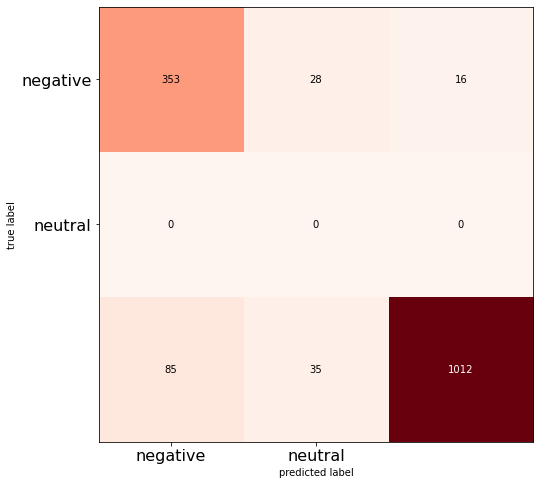

[[ 353   28   16]
 [   0    0    0]
 [  85   35 1012]]


In [40]:
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(x_train,y_train)
print(classification_report( ovr.predict(x_val) , y_val))
print(accuracy_score( ovr.predict(x_val) , y_val ))
cm=confusion_matrix(ovr.predict(x_val) , y_val)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['negative','neutral','positive'], fontsize=16,color='black')
plt.yticks(range(2), ['negative','neutral','positive'], fontsize=16)
plt.show()
print(confusion_matrix(ovr.predict(x_val) , y_val))

              precision    recall  f1-score   support

          -1       0.90      0.87      0.89       453
           0       0.17      0.85      0.29        13
           1       0.97      0.94      0.96      1063

    accuracy                           0.92      1529
   macro avg       0.68      0.89      0.71      1529
weighted avg       0.95      0.92      0.93      1529

0.920863309352518


<Figure size 432x288 with 0 Axes>

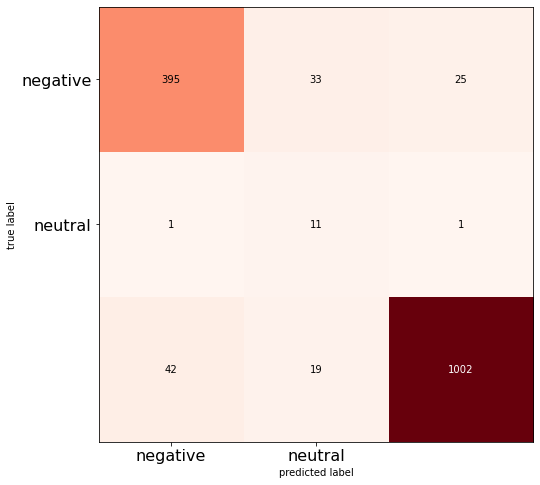

[[ 395   33   25]
 [   1   11    1]
 [  42   19 1002]]


In [47]:
svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))
cm=confusion_matrix(svm.predict(x_val) , y_val)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['negative','neutral','positive'], fontsize=16,color='black')
plt.yticks(range(2), ['negative','neutral','positive'], fontsize=16)
plt.show()
print(confusion_matrix(svm.predict(x_val) , y_val))

              precision    recall  f1-score   support

          -1       0.66      0.91      0.76       316
           0       0.00      0.00      0.00         0
           1       0.99      0.84      0.91      1213

    accuracy                           0.85      1529
   macro avg       0.55      0.58      0.56      1529
weighted avg       0.92      0.85      0.88      1529

0.854807063440157


<Figure size 432x288 with 0 Axes>

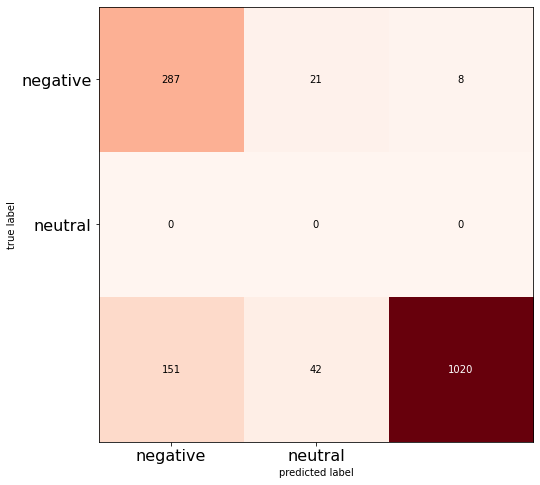

[[ 287   21    8]
 [   0    0    0]
 [ 151   42 1020]]


In [48]:
MB=MultinomialNB()
MB.fit(x_train,y_train)
print(classification_report( MB.predict(x_val) , y_val))
print(accuracy_score( MB.predict(x_val) , y_val ))
cm=confusion_matrix(MB.predict(x_val) , y_val)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['negative','neutral','positive'], fontsize=16,color='black')
plt.yticks(range(2), ['negative','neutral','positive'], fontsize=16)
plt.show()
print(confusion_matrix(MB.predict(x_val) , y_val))

              precision    recall  f1-score   support

          -1       0.80      0.88      0.84       398
           0       0.00      0.00      0.00         0
           1       0.98      0.89      0.94      1131

    accuracy                           0.89      1529
   macro avg       0.60      0.59      0.59      1529
weighted avg       0.94      0.89      0.91      1529

0.8914323086984958


<Figure size 432x288 with 0 Axes>

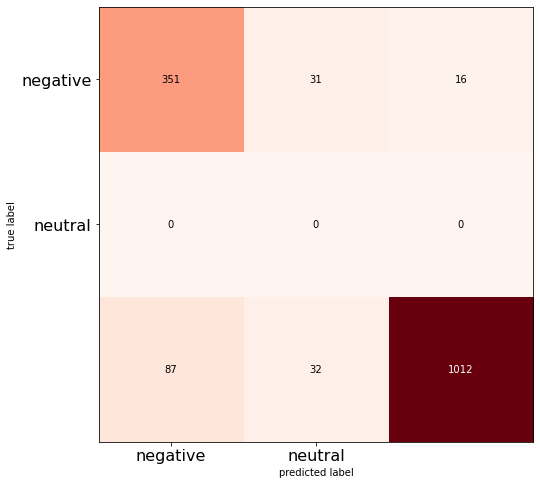

[[ 351   31   16]
 [   0    0    0]
 [  87   32 1012]]


In [49]:
estimators = [ ('svm',svm) , ('ovr' , ovr) ,('MB',MB)]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(x_train,y_train)
print(classification_report( clf.predict(x_val) , y_val))
print(accuracy_score( clf.predict(x_val) , y_val ))
cm=confusion_matrix(clf.predict(x_val) , y_val)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['negative','neutral','positive'], fontsize=16,color='black')
plt.yticks(range(2), ['negative','neutral','positive'], fontsize=16)
plt.show()
print(confusion_matrix(clf.predict(x_val) , y_val))